In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#implementing Ridge and Lasso regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer


In [3]:
#importing dataframe
from codecs import utf_16_decode


df=pd.read_csv(r'C:\Users\1900120\Downloads\Fare amount prediction\trip.csv')

In [4]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.shape

(200000, 9)

In [5]:
#checking dtypes of data
df.dtypes

index                  int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
#droping nun
df.dropna(inplace=True)

In [9]:
df.index.nunique()

199999

In [10]:
#checking unique count 
for i in df.columns:
    print(i,df[i].nunique())

index 199999
key 199999
fare_amount 1244
pickup_datetime 196628
pickup_longitude 71065
pickup_latitude 83835
dropoff_longitude 76894
dropoff_latitude 90585
passenger_count 8


index and key are contains unique value in all the rows we can drop that 

In [11]:
#checking statistical info of data
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


##Exploratory Data Analysis

In [12]:
fig,ax=plt.subplots(1,3, figsize=(15,8))
sns.distplot(df.fare_amount,ax=ax[0])
sns.boxplot(df.fare_amount, ax=ax[1])
stats.probplot(df.fare_amount,plot=plt)

((array([-4.49578133, -4.30332924, -4.1988695 , ...,  4.1988695 ,
          4.30332924,  4.49578133]),
  array([-52. , -52. , -50.5, ..., 275. , 350. , 499. ])),
 (7.917393426371685, 11.359891549457744, 0.7995780497410335))

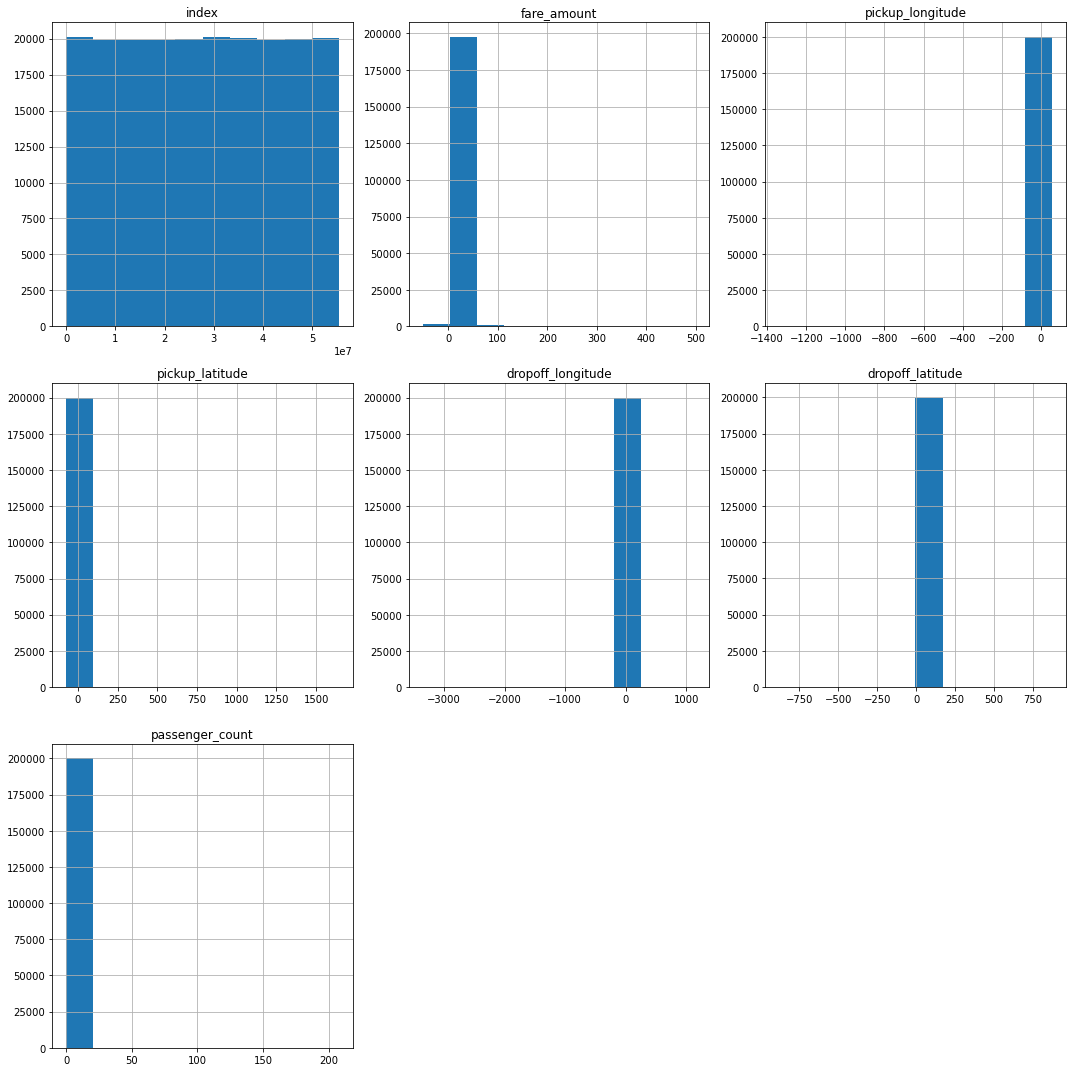

In [64]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

In [13]:
df.skew()

index                -0.001823
fare_amount           4.504900
pickup_longitude     -7.495874
pickup_latitude      62.976706
dropoff_longitude   -71.505102
dropoff_latitude     -8.031012
passenger_count      18.145667
dtype: float64

In [14]:
#extracting date month time from date time columns
df["dates"]=pd.to_datetime(df['pickup_datetime'])
df['months']=df["dates"].dt.month
df['hour']=df["dates"].dt.hour
df['day']=df["dates"].dt.day
df['year']=df["dates"].dt.year
df['min']=df['dates'].dt.minute


In [15]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dates,months,hour,day,year,min
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06+00:00,5,19,7,2015,52
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56+00:00,7,20,17,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00+00:00,8,21,24,2009,45
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21+00:00,6,8,26,2009,22
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00+00:00,8,17,28,2014,47


In [68]:
df1=pd.DataFrame()
df2=pd.DataFrame()

In [16]:
df=df[df['fare_amount']>=0 ]
df=df[df['passenger_count']<10]
df=df[(df['pickup_latitude']<=90.0) & (df['pickup_latitude']>=-90.0)]
df=df[(df['dropoff_latitude']<=90.0) & (df['dropoff_latitude']>=-90.0)]
df=df[(df['pickup_longitude']<=180.0) & (df['pickup_longitude']>=-180.0)]
df=df[(df['dropoff_longitude']<=180.0) & (df['dropoff_longitude']>=-180.0)]

In [17]:
df.shape

(199969, 15)

In [18]:
import dtale
dtale.show(df)

Executing shutdown due to inactivity...


2022-10-15 13:14:51,190 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-10-15 13:14:55,326 - INFO     - Executing shutdown...


Feature selection

In [72]:
#droping index and key
df.drop(['index','key'],axis=1,inplace=True)

In [73]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dates,months,hour,day,year,min
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06+00:00,5,19,7,2015,52
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56+00:00,7,20,17,2009,4
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00+00:00,8,21,24,2009,45
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21+00:00,6,8,26,2009,22
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00+00:00,8,17,28,2014,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00+00:00,10,10,28,2012,49
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00+00:00,3,1,14,2014,9
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29 00:42:00+00:00,6,0,29,2009,42
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20 14:56:25+00:00,5,14,20,2015,56


In [74]:
#droping timestamp
df.drop('pickup_datetime',axis=1,inplace=True)

In [75]:
df.drop('dates',axis=1,inplace=True)

In [76]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [77]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199969 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199969 non-null  float64
 1   pickup_longitude   199969 non-null  float64
 2   pickup_latitude    199969 non-null  float64
 3   dropoff_longitude  199969 non-null  float64
 4   dropoff_latitude   199969 non-null  float64
 5   passenger_count    199969 non-null  int64  
 6   months             199969 non-null  int64  
 7   hour               199969 non-null  int64  
 8   day                199969 non-null  int64  
 9   year               199969 non-null  int64  
 10  min                199969 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 MB


In [79]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,months,hour,day,year,min
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,19,7,2015,52
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,20,17,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,21,24,2009,45
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,6,8,26,2009,22
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,8,17,28,2014,47
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,10,28,2012,49
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,3,1,14,2014,9
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,6,0,29,2009,42
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,5,14,20,2015,56


In [80]:
#finding the f scores of each features
f_scores = f_regression(X, Y)
f_scores

(array([2.69465040e+01, 2.66129100e+01, 2.91405563e+01, 3.09818334e+01,
        2.42999741e+01, 1.11212681e+02, 9.21048149e+01, 3.69539959e-01,
        2.84776480e+03, 1.27320743e+01]),
 array([2.09368994e-07, 2.48813680e-07, 6.73893855e-08, 2.60787560e-08,
        8.25059850e-07, 5.39943590e-26, 8.31003794e-22, 5.43255827e-01,
        0.00000000e+00, 3.59521689e-04]))

2022-10-14 20:23:21,573 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-10-14 20:23:21,591 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


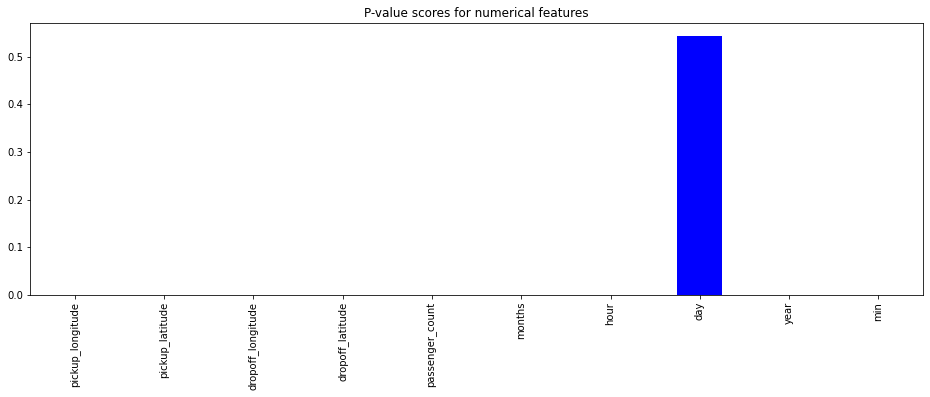

In [81]:
#The second array consists of p-values that we need.
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

2022-10-14 20:23:22,259 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


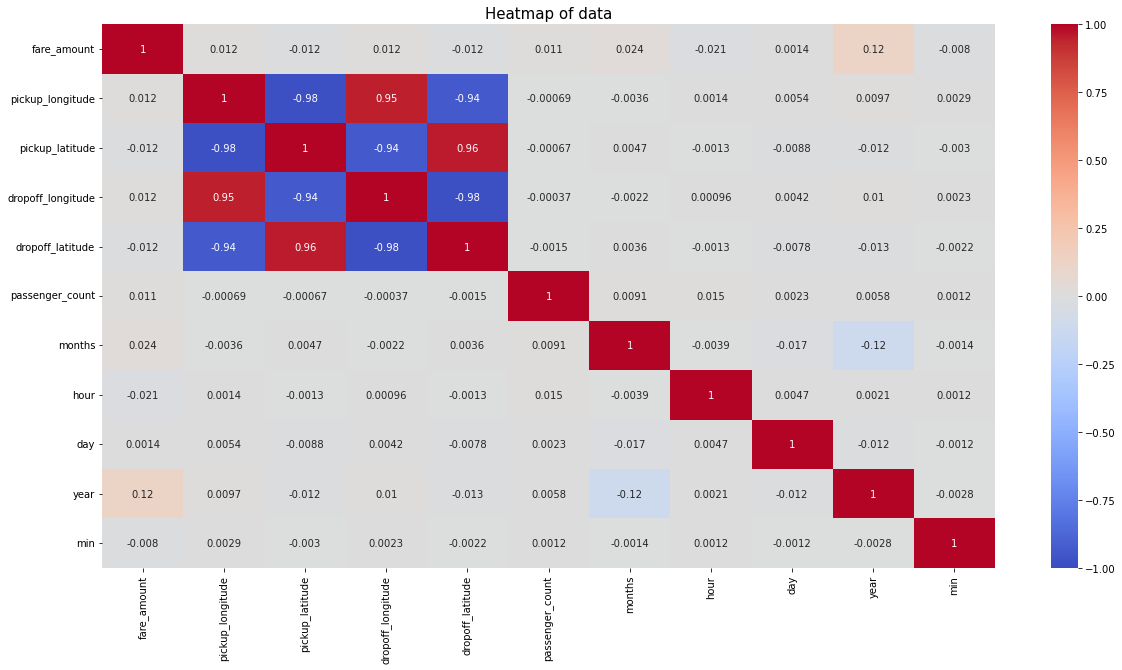

In [82]:
#checking correlation with all columns using heat map
corrmat = df.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True,cmap='coolwarm')
plt.title("Heatmap of data",fontsize= 15)
plt.show()

Feature engineering

In [83]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

fare_amount          17154
pickup_longitude     13550
pickup_latitude       9418
dropoff_longitude    14196
dropoff_latitude     12142
passenger_count      22551
months                   0
hour                     0
day                      0
year                     0
min                      0
dtype: int64

In [84]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'months',
       'hour', 'day', 'year', 'min'],
      dtype='object')

In [85]:
def distance(x):
      you = "{0},{1}".format(x['pickup_latitude'],x['pickup_longitude'])

      me = "{0},{1}".format(x['dropoff_latitude'],x['dropoff_longitude'])

      km = geodesic(me,you).kilometers
      return km
     

In [86]:
df['distance']=df.apply(distance,axis=1)

In [87]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,months,hour,day,year,min,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,19,7,2015,52,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,20,17,2009,4,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,21,24,2009,45,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,6,8,26,2009,22,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,8,17,28,2014,47,4.483730
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,10,28,2012,49,0.112128
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,3,1,14,2014,9,1.879635
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,6,0,29,2009,42,12.867916
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,5,14,20,2015,56,3.536552


In [88]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

test and train split

In [89]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [90]:
#spliting train and test
from sklearn.model_selection import train_test_split 
X_train1, X_test1, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 20) 
print(X_train1.shape)
print(X_test1.shape)

(159975, 7)
(39994, 7)


In [91]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)


In [92]:
reg = LinearRegression()
lasso  = Lasso()
ridge = Ridge()
tree1 = DecisionTreeRegressor(random_state=10)
regressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)


In [93]:
# try ploynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [94]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge()],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()],
           ['LGBMRegressor: ', LGBMRegressor()]          
        ]

In [95]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

In [96]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,5.950611,6.032493,0.017066,0.014606,9.778459,9.959301
1,Lasso:,6.010598,6.077431,0.004078,0.003760,9.842854,10.013961
2,Ridge:,5.950611,6.032493,0.017066,0.014606,9.778459,9.959300
3,PolynomialRegression:,4.736211,4.804617,0.219858,0.241868,8.711545,8.735670
4,DecisionTreeRegressor:,0.000053,3.268470,0.999999,0.443498,0.011076,7.484408
5,RandomForestRegressor:,0.878237,2.367876,0.962568,0.729380,1.908221,5.219195
6,GradientBoostingRegressor:,2.201446,2.218106,0.758203,0.755988,4.849915,4.955976
7,XGBRegressor:,2.028010,2.215863,0.838763,0.748072,3.960418,5.035729
8,LGBMRegressor:,2.193721,2.279247,0.758779,0.719841,4.844134,5.310384


RandomForestRegressor

In [98]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':Integer(4,40) ,
                          'min_samples_leaf': Integer(3,20),
                          'min_samples_split': Integer(3,20),
                          'n_estimators': Integer(10,200),
                          'max_features': ["auto", "sqrt", "log2"],
                          'bootstrap' : [True, False]

                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=18, min_samples_split=10, n_estimators=13; total time=   2.0s
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=18, min_samples_split=10, n_estimators=13; total time=   2.0s
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=18, min_samples_split=10, n_estimators=13; total time=   1.9s
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=18, min_samples_split=10, n_estimators=13; total time=   2.0s
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=18, min_samples_split=10, n_estimators=13; total time=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=23, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=  31.7s
[CV] END bootstrap=True, max_depth=23, max_features=auto, mi

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [99]:
lr_bayes.best_estimator_

RandomForestRegressor(max_depth=14, max_features='auto', min_samples_leaf=12,
                      min_samples_split=4, n_estimators=34, random_state=10)

In [100]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.7957079597458321
Test R2 score :  0.7548045433362522


GradientBoostingRegressor

In [101]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=gdb ,
                           search_spaces = {
                           'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                          "criterion":['friedman_mse', 'squared_error'],
                          'max_depth': Integer(4,6),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,200)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=quantile, max_depth=4, min_samples_leaf=45, min_samples_split=150, n_estimators=43; total time=  21.0s
[CV] END criterion=friedman_mse, loss=quantile, max_depth=4, min_samples_leaf=45, min_samples_split=150, n_estimators=43; total time=  29.2s
[CV] END criterion=friedman_mse, loss=quantile, max_depth=4, min_samples_leaf=45, min_samples_split=150, n_estimators=43; total time=  18.7s
[CV] END criterion=friedman_mse, loss=quantile, max_depth=4, min_samples_leaf=45, min_samples_split=150, n_estimators=43; total time=  18.9s
[CV] END criterion=friedman_mse, loss=quantile, max_depth=4, min_samples_leaf=45, min_samples_split=150, n_estimators=43; total time=  19.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=quantile, max_depth=4, min_samples_leaf=44, min_samples_split=91, n_estimators=164; total time= 1.2min
[CV] END criterion=friedman_mse, los

2022-10-14 21:38:46,196 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-10-14 21:38:51,162 - INFO     - Executing shutdown...


[CV] END criterion=squared_error, loss=absolute_error, max_depth=6, min_samples_leaf=26, min_samples_split=51, n_estimators=186; total time= 1.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=huber, max_depth=6, min_samples_leaf=36, min_samples_split=137, n_estimators=115; total time= 1.2min
[CV] END criterion=friedman_mse, loss=huber, max_depth=6, min_samples_leaf=36, min_samples_split=137, n_estimators=115; total time= 1.2min
[CV] END criterion=friedman_mse, loss=huber, max_depth=6, min_samples_leaf=36, min_samples_split=137, n_estimators=115; total time= 1.2min
[CV] END criterion=friedman_mse, loss=huber, max_depth=6, min_samples_leaf=36, min_samples_split=137, n_estimators=115; total time= 1.8min
[CV] END criterion=friedman_mse, loss=huber, max_depth=6, min_samples_leaf=36, min_samples_split=137, n_estimators=115; total time= 1.8min


BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'criterion': ['friedman_mse', 'squared_error'],
                             'loss': ['squared_error', 'absolute_error',
                                      'huber', 'quantile'],
                             'max_depth': Integer(low=4, high=6, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [102]:
lr_bayes.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_leaf=36,
                          min_samples_split=124, n_estimators=120,
                          random_state=10)

In [103]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.7697031577702327
Test R2 score :  0.7604872654023626


XGB regression

In [104]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=xgb ,
                       search_spaces = {
                          'max_depth': Integer(4,25),
                          'min_samples_split' :Integer(10,200),
                          'n_estimators': Integer(10,200),
                          'min_samples_leaf' :Integer(10,200)
                        },cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[21:48:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=13, min_samples_leaf=61, min_samples_split=126, n_estimators=38; total time=  52.8s
[21:49:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly her

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
              n_iter=10, scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=25, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [105]:
lr_bayes.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             min_samples_leaf=143, min_samples_split=62, missing=nan,
             monotone_constraints='()', n_estimators=37, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=10, ...)

In [106]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.804191608257466
Test R2 score :  0.7572779244163612


LGBM regression

In [107]:
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lgbm ,
                           search_spaces = {
                            'max_depth': Integer(4,40),
                          'num_leaves': Integer(3,200),
                         'n_estimators': Integer(3,200),
              
                         'min_split_gain': Integer(1.0,10.0),
                         'n_jobs':Integer(1,30),
                        
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=33, min_split_gain=2, n_estimators=54, n_jobs=2, num_leaves=9; total time=   3.7s
[CV] END max_depth=33, min_split_gain=2, n_estimators=54, n_jobs=2, num_leaves=9; total time=   2.5s
[CV] END max_depth=33, min_split_gain=2, n_estimators=54, n_jobs=2, num_leaves=9; total time=   1.2s
[CV] END max_depth=33, min_split_gain=2, n_estimators=54, n_jobs=2, num_leaves=9; total time=   1.2s
[CV] END max_depth=33, min_split_gain=2, n_estimators=54, n_jobs=2, num_leaves=9; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=27, min_split_gain=9, n_estimators=65, n_jobs=8, num_leaves=148; total time=   2.3s
[CV] END max_depth=27, min_split_gain=9, n_estimators=65, n_jobs=8, num_leaves=148; total time=   2.1s
[CV] END max_depth=27, min_split_gain=9, n_estimators=65, n_jobs=8, num_leaves=148; total time=   1.6s
[CV] END max_depth=27, min_split_gain=9, n_estimators=65, n_jobs=8, 

BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'min_split_gain': Integer(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=3, high=200, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=3, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [108]:
lr_bayes.best_estimator_

LGBMRegressor(max_depth=39, min_split_gain=5, n_estimators=156, n_jobs=7,
              num_leaves=8, random_state=10)

In [109]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.736147059728897
Test R2 score :  0.7204988971053659


In [112]:
import evalml

In [113]:
from evalml.automl import AutoMLSearch
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='regression')
automl.search()

2022-10-14 22:19:21,686 - INFO     - AutoMLSearch will use mean CV score to rank pipelines.
2022-10-14 22:19:21,697 - INFO     - Using default limit of max_batches=3.

2022-10-14 22:19:21,865 - INFO     - 
*****************************
2022-10-14 22:19:21,867 - INFO     - * Beginning pipeline search *
2022-10-14 22:19:21,873 - INFO     - *****************************
2022-10-14 22:19:21,877 - INFO     - 
2022-10-14 22:19:21,879 - INFO     - Optimizing for R2. 
2022-10-14 22:19:21,880 - INFO     - Greater score is better.

2022-10-14 22:19:21,894 - INFO     - Using SequentialEngine to train and score pipelines.
2022-10-14 22:19:21,897 - INFO     - Searching up to 3 batches for a total of None pipelines. 
2022-10-14 22:19:21,910 - INFO     - Allowed model families: 

2022-10-14 22:19:22,030 - INFO     - Evaluating Baseline Pipeline: Mean Baseline Regression Pipeline
2022-10-14 22:19:22,572 - INFO     - Mean Baseline Regression Pipeline:
2022-10-14 22:19:22,572 - INFO     - 	Starting cros

2022-10-14 22:19:40,502 - INFO     - Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer + RF Regressor Select From Model:
2022-10-14 22:19:40,503 - INFO     - 	Starting cross validation
2022-10-14 22:19:40,505 - INFO     - 	Finished cross validation - mean R2: 0.726
2022-10-14 22:19:41,223 - INFO     - 
*****************************
2022-10-14 22:19:41,224 - INFO     - * Evaluating Batch Number 3 *
2022-10-14 22:19:41,228 - INFO     - *****************************
2022-10-14 22:19:41,228 - INFO     - 
2022-10-14 22:19:42,186 - INFO     - Decision Tree Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer:
2022-10-14 22:19:42,187 - INFO     - 	Starting cross validation
2022-10-14 22:19:42,188 - INFO     - 	Finished cross validation - mean R2: 0.710
2022-10-14 22:19:43,989 - INFO     - Extra Trees Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer:
2022-10-14 22:19:43,990 - INFO     - 	Starting cros

{1: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:01',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer': '00:04',
  'Total time of batch': '00:06'},
 2: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Regressor Select From Model': '00:03',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer + RF Regressor Select From Model': '00:07',
  'Total time of batch': '00:11'},
 3: {'Decision Tree Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'Extra Trees Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'XGBoost Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:09',
  'CatBoost Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'LightGBM Regressor w/ Replace

In [114]:
automl.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,Random Forest Regressor w/ Replace Nullable Ty...,2,0.740919,NaN,NaN,3.121001e+06,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,4,Random Forest Regressor w/ Replace Nullable Ty...,4,0.725842,NaN,NaN,3.057493e+06,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,7,XGBoost Regressor w/ Replace Nullable Types Tr...,7,0.711141,NaN,NaN,2.995569e+06,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,Decision Tree Regressor w/ Replace Nullable Ty...,5,0.710051,NaN,NaN,2.990976e+06,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,9,LightGBM Regressor w/ Replace Nullable Types T...,9,0.682736,NaN,NaN,2.875924e+06,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,6,Extra Trees Regressor w/ Replace Nullable Type...,6,0.293405,NaN,NaN,1.235983e+06,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,8,CatBoost Regressor w/ Replace Nullable Types T...,8,0.290731,NaN,NaN,1.224720e+06,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Elastic Net Regressor w/ Replace Nullable Type...,1,0.016785,NaN,NaN,7.080310e+04,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,3,Elastic Net Regressor w/ Replace Nullable Type...,3,0.001111,NaN,NaN,4.780627e+03,False,{'Imputer': {'categorical_impute_strategy': 'm...
9,0,Mean Baseline Regression Pipeline,0,-0.000024,NaN,NaN,0.000000e+00,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [115]:
automl.best_pipeline

pipeline = RegressionPipeline(component_graph={'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Random Forest Regressor': ['Random Forest Regressor', 'Imputer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Random Forest Regressor':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}, random_seed=0)

In [116]:
best_pipeline=automl.best_pipeline

In [117]:
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


***************************************************************************


2022-10-14 22:20:09,384 - INFO     - 
***************************************************************************


* Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer *


2022-10-14 22:20:09,387 - INFO     - * Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer *


***************************************************************************


2022-10-14 22:20:09,389 - INFO     - ***************************************************************************


2022-10-14 22:20:09,392 - INFO     - 


Problem Type: regression


2022-10-14 22:20:09,396 - INFO     - Problem Type: regression


Model Family: Random Forest


2022-10-14 22:20:09,399 - INFO     - Model Family: Random Forest


2022-10-14 22:20:09,402 - INFO     - 


Pipeline Steps


2022-10-14 22:20:09,404 - INFO     - Pipeline Steps


2022-10-14 22:20:09,408 - INFO     - ==============


1. Replace Nullable Types Transformer


2022-10-14 22:20:09,411 - INFO     - 1. Replace Nullable Types Transformer


2. Imputer


2022-10-14 22:20:09,414 - INFO     - 2. Imputer


	 * categorical_impute_strategy : most_frequent


2022-10-14 22:20:09,415 - INFO     - 	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


2022-10-14 22:20:09,418 - INFO     - 	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


2022-10-14 22:20:09,420 - INFO     - 	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


2022-10-14 22:20:09,422 - INFO     - 	 * categorical_fill_value : None


	 * numeric_fill_value : None


2022-10-14 22:20:09,425 - INFO     - 	 * numeric_fill_value : None


	 * boolean_fill_value : None


2022-10-14 22:20:09,427 - INFO     - 	 * boolean_fill_value : None


3. Random Forest Regressor


2022-10-14 22:20:09,431 - INFO     - 3. Random Forest Regressor


	 * n_estimators : 100


2022-10-14 22:20:09,433 - INFO     - 	 * n_estimators : 100


	 * max_depth : 6


2022-10-14 22:20:09,433 - INFO     - 	 * max_depth : 6


	 * n_jobs : -1


2022-10-14 22:20:09,446 - INFO     - 	 * n_jobs : -1


2022-10-14 22:20:09,451 - INFO     - 


Training


2022-10-14 22:20:09,453 - INFO     - Training


2022-10-14 22:20:09,455 - INFO     - ========


Training for regression problems.


2022-10-14 22:20:09,457 - INFO     - Training for regression problems.


Total training time (including CV): 4.4 seconds


2022-10-14 22:20:09,465 - INFO     - Total training time (including CV): 4.4 seconds


2022-10-14 22:20:09,466 - INFO     - 


Cross Validation


2022-10-14 22:20:09,470 - INFO     - Cross Validation


----------------


2022-10-14 22:20:09,478 - INFO     - ----------------


               R2 ExpVariance MaxError MedianAE    MSE   MAE Root Mean Squared Error # Training # Validation
0           0.741       0.741  483.152    1.372 25.106 2.301                   5.011     39,993      119,982
mean        0.741       0.741  483.152    1.372 25.106 2.301                   5.011          -            -
std             -           -        -        -      -     -                       -          -            -
coef of var     -           -        -        -      -     -                       -          -            -


2022-10-14 22:20:09,498 - INFO     -                R2 ExpVariance MaxError MedianAE    MSE   MAE Root Mean Squared Error # Training # Validation
0           0.741       0.741  483.152    1.372 25.106 2.301                   5.011     39,993      119,982
mean        0.741       0.741  483.152    1.372 25.106 2.301                   5.011          -            -
std             -           -        -        -      -     -                       -          -            -
coef of var     -           -        -        -      -     -                       -          -            -


In [118]:
best_pipeline.score(X_test,y_test,objectives=['r2','mae'])

OrderedDict([('R2', 0.747207495139617), ('MAE', 2.309859218041412)])

In [121]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso(alpha=0.0002953248602060644, max_iter=3000, random_state=10)],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge(alpha=0.00037654260652948403, max_iter=3000)],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor(max_depth=11, min_samples_leaf=25, min_samples_split=91,
                      random_state=10)],
           ['RandomForestRegressor: ',RandomForestRegressor(max_depth=14, max_features='auto', min_samples_leaf=12,
                      min_samples_split=4, n_estimators=34, random_state=10)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor(max_depth=5, min_samples_leaf=36,
                          min_samples_split=124, n_estimators=120,random_state=10)] ,
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             min_samples_leaf=143, min_samples_split=62,
             monotone_constraints='()', n_estimators=37, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=10)],
           ['LGBMRegressor: ', LGBMRegressor(max_depth=39, min_split_gain=5, n_estimators=156, n_jobs=7,
              num_leaves=8, random_state=10)]          
        ]

In [122]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[22:27:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [123]:
metrics_df = pd.DataFrame(model_data)
metrics_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,5.950611,6.032493,0.017066,0.014606,9.778459,9.959301
1,Lasso:,5.950612,6.032488,0.017066,0.014607,9.778459,9.959298
2,Ridge:,5.950611,6.032493,0.017066,0.014606,9.778459,9.959300
3,PolynomialRegression:,4.713465,4.781486,0.219935,0.242824,8.711116,8.730163
4,DecisionTreeRegressor:,2.176207,2.252705,0.766891,0.748673,4.761984,5.029714
5,RandomForestRegressor:,2.019536,2.216403,0.795708,0.754805,4.457939,4.967984
6,GradientBoostingRegressor:,2.161151,2.193522,0.769703,0.760487,4.733173,4.910076
7,XGBRegressor:,2.108159,2.195845,0.804192,0.757278,4.364395,4.942863
8,LGBMRegressor:,2.239616,2.285219,0.736147,0.720499,5.066282,5.304149


<AxesSubplot:title={'center':'R2 Score Results'}, xlabel='Name'>

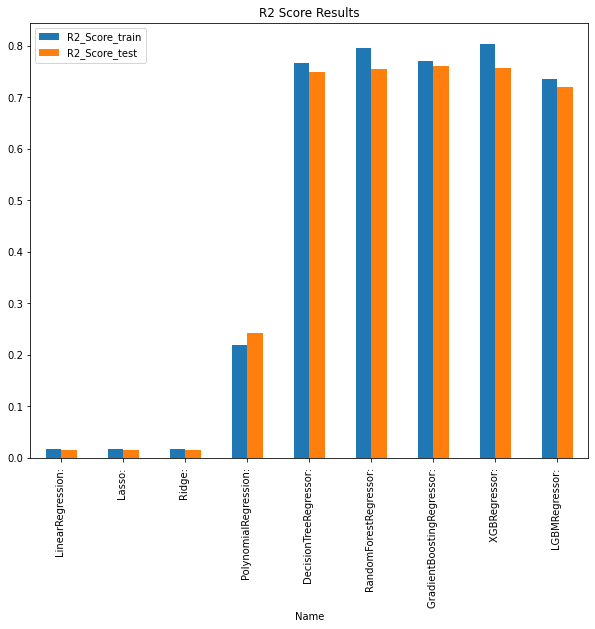

: 

In [124]:
#representing r2 score through bar plot
metrics_df.plot(x="Name", y=['R2_Score_train' , 'R2_Score_test'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) 

conclusion
*XGBRegressor is performing better having 0.8 r2 value for train dataset 0.76 r2 value for test dataset
*We can observe from dataset that single passengers are the most frequent travelers, and the highest fare 
also seems to come from cabs which carry just 1 passenger
*The fares throughout the month mostly seem uniform
*During hours 6 PM to 11PM the frequency of cab boarding is very due to peak hours
*Fare prices during 2PM to 8PM is bit high compared to all other time might be due to high 
demands.
*Cab fare is high on Friday, Saturday and Monday, may be during weekend and first day of the 
working day they charge high fares because of high demands of cabs.
